# Kaggle Titanic
This notebook is made for EDA of titanic data

## Modules

In [1]:
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls ../input/titanic

gender_submission.csv  test.csv  titanic.zip  train.csv


## Data

In [3]:
# general info 
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

print("train data shape : ", train.shape)
print("test data shape : ", test.shape)

train.head(10)

train data shape :  (891, 12)
test data shape :  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
tmp_for_viz = train.copy()
tmp_for_viz["Survived"] = tmp_for_viz["Survived"].replace([0, 1], ["death", "survived"])
tmp_for_viz.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,death,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
profile = pdp.ProfileReport(train)
profile.to_file("profile_titanic_train.html")

## Visualization

### Age & Survived
- Ageが低いと, Surviveする?を確認.
    - 10才区切りだと?  
    -> 0~9才の生存率が高い?
    -> 20台の生存率が低い?
- Ageを横軸に縦軸にカウント, Survivedで層別.

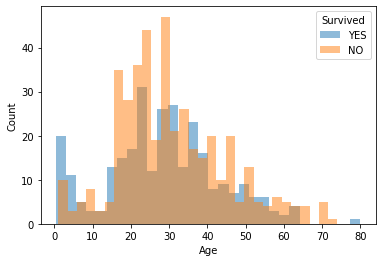

In [16]:
plt.hist(train["Age"][train["Survived"]==1], alpha=0.5, label="YES", bins=30)
plt.hist(train["Age"][train["Survived"]==0], alpha=0.5, label="NO", bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived")

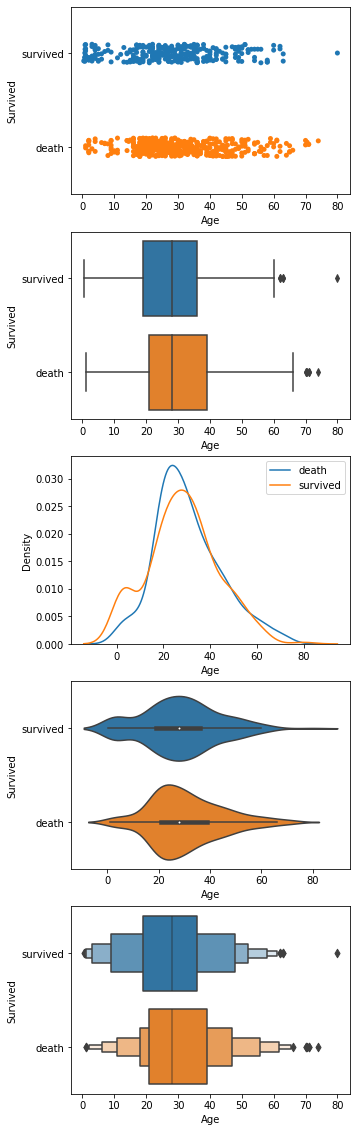

In [76]:
def plot_categorical_to_numerical(data, x, y):
    fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(5, 20))

    sns.stripplot(x=x, y=y, data=data, ax=axes[0])
    sns.boxplot(x=x, y=y, data=data, ax=axes[1])
    sns.kdeplot(x=data[x].loc[data[y]=="death"], label="death", ax=axes[2])
    sns.kdeplot(x=data[x].loc[data[y]=="survived"], label="survived", ax=axes[2])
    axes[2].legend()
    sns.violinplot(y=y, x=x, data=data, ax=axes[3])
    sns.boxenplot(y=y, x=x, data=data, ax=axes[4])
    plt.show()

plot_categorical_to_numerical(tmp_for_viz, x="Age", y="Survived")

<AxesSubplot:xlabel='AgeRange', ylabel='count'>

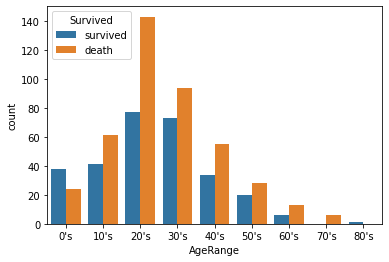

In [27]:
tmp_for_viz["AgeRange"] = tmp_for_viz["Age"].dropna().map(lambda x:str(int(x//10*10))+"'s")
tmp_for_viz = tmp_for_viz.sort_values("Age")
sns.countplot(x="AgeRange", hue="Survived", data=tmp_for_viz)

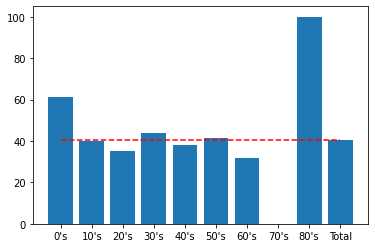

In [73]:
_ = pd.crosstab(tmp_for_viz["AgeRange"], tmp_for_viz["Survived"], margins=True, margins_name='Total')
_["survival_ratio"] = _["survived"] / _["Total"] * 100
plt.bar(_.index, _["survival_ratio"])
plt.hlines(_["survival_ratio"].Total, xmin=_.index[0], xmax=_.index[-1], colors="r", linestyles="dashed")

In [74]:
_

Survived,death,survived,Total,survival_ratio
AgeRange,,,,
0's,24,38,62,61.290323
10's,61,41,102,40.196078
20's,143,77,220,35.000000
30's,94,73,167,43.712575
40's,55,34,89,38.202247
50's,28,20,48,41.666667
60's,13,6,19,31.578947
70's,6,0,6,0.000000
80's,0,1,1,100.000000


### Pclass & Survived
- よいTicket(1が上層, 2が普通, 3が下層)を持っているとSurvivedは?  
-> 1のチケットだと生存率が高い.  
-> 3のチケットだと生存率が低い.
- Pclassを横軸に縦軸にカウント, Survivedで層別.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

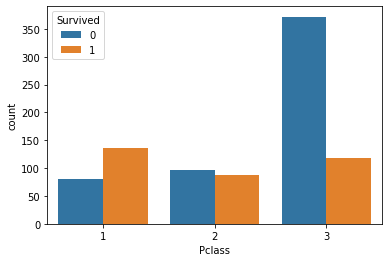

In [40]:
sns.countplot(x="Pclass", data=train, hue="Survived")

### Parch-Sibsp & Survived
- 家族といるほうがSurviveする?
- Parch, Sibspを横軸に縦軸にカウント, Survivedで層別.

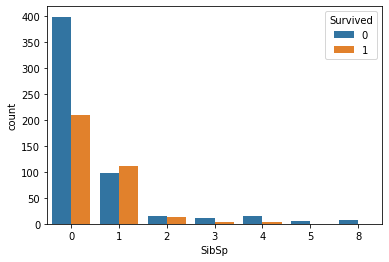

In [49]:
sns.countplot(x="SibSp", data=train, hue="Survived")
plt.legend(loc="upper right", title="Survived")

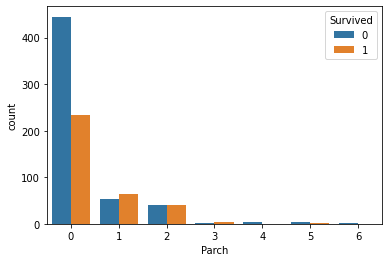

In [48]:
sns.countplot(x="Parch", data=train, hue="Survived")
plt.legend(loc="upper right", title="Survived")

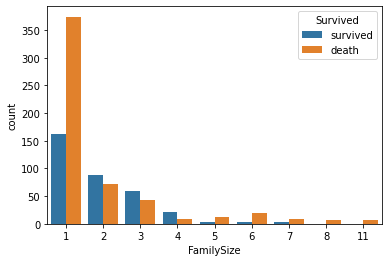

In [75]:
tmp_for_viz["FamilySize"] = tmp_for_viz["Parch"] + tmp_for_viz["SibSp"] + 1
sns.countplot(x="FamilySize", data=tmp_for_viz, hue="Survived")
plt.legend(loc="upper right", title="Survived")

### Sex & Survived
- 女性のほうがSurviveする?
- Sex, Sibspを横軸に縦軸にカウント, Survivedで層別.

<AxesSubplot:xlabel='Sex', ylabel='count'>

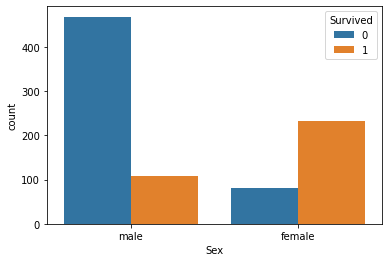

In [51]:
sns.countplot(x="Sex", data=train, hue="Survived")

### Fare & Survived
- Fare, Sibspを横軸に縦軸にカウント, Survivedで層別.

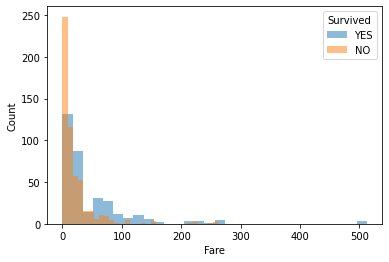

In [53]:
plt.hist(train["Fare"][train["Survived"]==1], alpha=0.5, label="YES", bins=30)
plt.hist(train["Fare"][train["Survived"]==0], alpha=0.5, label="NO", bins=30)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(title="Survived")

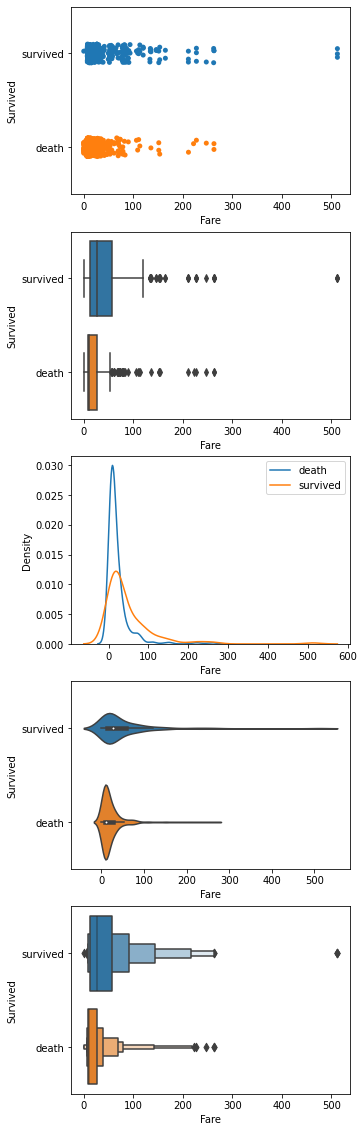

In [77]:
plot_categorical_to_numerical(data=tmp_for_viz, x="Fare", y="Survived")